# Telecom Churn Prediction

### Company Introduction
Your client for this project is a Telecom Service Provider called **WeConnect**.

- The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.
- The objective is to use the model to take further actions for preventing customers to churn.
- They will have to offer something to their customers so they stick around, example - a promo, discount, loyalty program etc.


### Current Scenario
- Till now they have been using traditional ways which now have become a problem to handle due to human interventions.
- They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.

### Problems:

- Due to the boom in the telecom industry with **4G technology**, it has become a pain in the neck for the company to **retain their customers**.
- They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
- It is **plausible** for customers to choose **4G services over 3G services** due to benefits of **cost, speed, latency** etc.

### Goal:
- You are given datasets of past customers and their status (Churn: Yes or No).
- Your task is to build a classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Importing the Data

In [130]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report

In [131]:
#Importing Dataset
churn_data = pd.read_csv("Churn_train.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


| Column Name | Description |
| :- | :- |
| CustomerID	| Passenger Identity |
| Gender	| Whether the customer is a male or a female |
| SeniorCitizen	| Whether the customer is a senior citizen or not (1, 0) |
| Partner	| Whether the customer has a partner or not (Yes, No) |
| Dependents	| Whether the customer has dependents or not (Yes, No) |
| Tenure	| Number of months the customer has stayed with the company |
| PhoneService	| Whether the customer has a phone service or not (Yes, No) |
| MultipleLines	| Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService	| Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity	| Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup	| Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection	| Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport	| Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV	| Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies	| Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract	| The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling	| Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod	| The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges	| The amount charged to the customer monthly |
| TotalCharges	| The total amount charged to the customer |
|Churn	| Whether the customer churned or not (Yes or No) |

### Understanding the Data

In [132]:
churn_data.shape

(5634, 21)

In [133]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [134]:
#Checking if any values in the variables are null 
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [135]:
columns = churn_data.columns
for i in columns:
    print(str(i)+"'s Unique count "+str(len(churn_data[str(i)].unique())))
    print(f"{churn_data[str(i)].unique()}\n")

customerID's Unique count 5634
['5442-PPTJY' '6261-RCVNS' '2176-OSJUV' ... '8868-WOZGU' '1251-KRREG'
 '5840-NVDCG']

gender's Unique count 2
['Male' 'Female']

SeniorCitizen's Unique count 2
[0 1]

Partner's Unique count 2
['Yes' 'No']

Dependents's Unique count 2
['Yes' 'No']

tenure's Unique count 73
[12 42 71 30  9 72 28  6 47 22  2  3  4 60 69 26 33  8 27 25 23 34 59 66
  5 45 49 24  1 40 51 68 32 44 67 11 53  7 55 31 13 63 64 10 62 35 57 20
 65 18 46 29 37 48 15 61 14 70 52 54 19 50 43 16 36 38 56 17 41 39 58 21
  0]

PhoneService's Unique count 2
['Yes' 'No']

MultipleLines's Unique count 3
['No' 'Yes' 'No phone service']

InternetService's Unique count 3
['No' 'DSL' 'Fiber optic']

OnlineSecurity's Unique count 3
['No internet service' 'Yes' 'No']

OnlineBackup's Unique count 3
['No internet service' 'Yes' 'No']

DeviceProtection's Unique count 3
['No internet service' 'Yes' 'No']

TechSupport's Unique count 3
['No internet service' 'Yes' 'No']

StreamingTV's Unique count 3
['No

# Key obeservations:-
1. The dependent variable in this dataset is Churn
2. No. of samples are 5634 rows and 21 cols
3. Dataset imbalanced
4. There are 4 numeric data type variables in the dataset before pre-processing
5. No missing values in the dataset
6. CustomerId feature in the dataset plays the role of unique ID	
7. label & one-hot-encoding should be used to deal with Categorical variables
8. Churn a categorical variable?
###

### Data Pre-processing

In [136]:
#Total Charge is string but should be float
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [137]:
# NA rows will be filled with Mean of TotalCharges column
churn_data['TotalCharges'].fillna(value=churn_data['TotalCharges'].mean(), inplace=True)
churn_data.head(-8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,3834-XUIFC,Male,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,85.20,602.55,Yes
5622,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,No
5623,6023-YEBUP,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.95,329.95,Yes
5624,5345-BMKWB,Male,0,Yes,No,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,158.35,No


In [138]:
#Tenure is int but should be float
churn_data['tenure'] = churn_data['tenure'].astype(float)

In [139]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42.0,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71.0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30.0,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [140]:
#Renaming values in PaymentMethod to simple terms, will be useful for encoding in future
payment_column = {'Electronic Check':'E-Check', 'Mailed check':'Mailed Check', 'Bank transfer (automatic)':'Bank Transfer','Credit card (automatic)':'Credit Card'}
churn_data.PaymentMethod.replace(payment_column,inplace=True)

### Exploratory Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

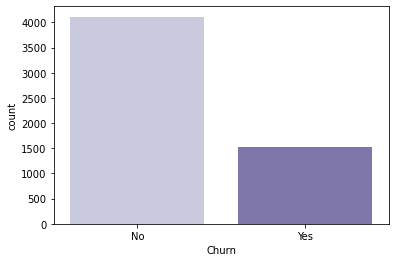

In [143]:
#Frequency distributio nof Chrun column
sns.countplot(x=churn_data['Churn'], palette='Purples', linewidth =1)

The distribution seems imbalance

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

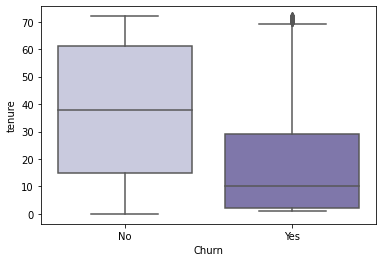

In [145]:
#Need to do boxplot between Churn and Tenure, MonthlyCharges, TotalCharges column
sns.boxplot(x=churn_data['Churn'], y=churn_data['tenure'], palette='Purples')

Insight : Users with lower tenure are the churning customers

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

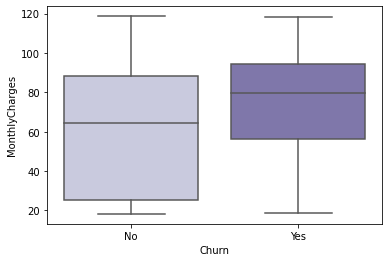

In [147]:
sns.boxplot(x=churn_data['Churn'], y=churn_data['MonthlyCharges'], palette='Purples')

Insight : Churning customers have high Monthly Charges. Their Interquartile range is lesser that non-chruning customers

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

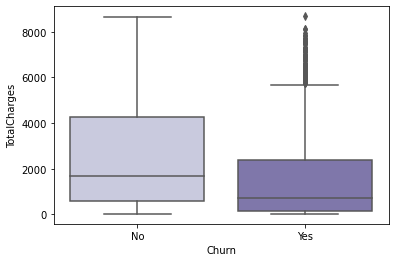

In [148]:
sns.boxplot(x=churn_data['Churn'], y=churn_data['TotalCharges'], palette='Purples')

Insight : Total Charges are a result of Tenure and Monthly Charges

In [150]:
#Checking for outlier in Numerical features, Will be usefull to decide scaling.
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
churn_num = churn_data[numerical_features]
churn_num.describe()

Q1 = churn_num.quantile(0.25)
Q3 = churn_num.quantile(0.75)
IQR = Q3 - Q1
((churn_num<(Q1 - 1.5*IQR)) | churn_num>(Q3 + 1.5*IQR)).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

# Important Questions

1. Which category has the highest proportion in the Sex column in train data?	Equal
2. How many missing cells are there in the train data before preprocessing?	0
3. What is the maximum value in the MonthlyCharges column of the train data before preprocessing?	118.65
4. Churn and Contract has strong Positive correlation	FALSE
5. Does the column Contract indicate categorical data or numeric data?	Categorical
6. What is the range of values (minimum to maximum) in the Tenure column of the train data before preprocessing?	0-72
7. Which original column has the highest positive correlation with the Churn column?	PaperlessBilling
8. Which original column has the highest negative correlation with the Churn column?	Tenure


No Outliers in numerical features hence no adjustment made.

### Feature Engineering

In [151]:
#customerID is unique value column and add no sense to data. Hence removed
churn_data.drop(columns ='customerID', inplace=True)

#### Label Encoding

In [152]:
churn_data.head(-5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,12.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed Check,19.70,258.35,No
1,Female,0,No,No,42.0,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit Card,73.90,3160.55,Yes
2,Male,0,Yes,No,71.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank Transfer,65.15,4681.75,No
3,Male,0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,Male,0,No,No,30.0,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,Male,0,Yes,No,8.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed Check,20.25,158.35,No
5625,Male,1,Yes,No,71.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank Transfer,23.95,1756.20,No
5626,Female,0,Yes,Yes,72.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit Card,84.70,5893.90,No
5627,Female,0,Yes,No,37.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank Transfer,19.85,717.50,No


In [153]:
#Features requires label encoding
label_features = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
def label_encoding(features,df):
    for i in features:
        df[i] = df[i].map({'Yes':1, 'No':0})
    

label_encoding(label_features,churn_data)
churn_data['gender'] = churn_data['gender'].map({'Female':1,'Male':0})


In [154]:
#Features requires one hot encoding
ohe_features = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection','StreamingTV','StreamingMovies','Contract','PaymentMethod']

churn_data = pd.get_dummies(churn_data,columns=ohe_features, drop_first=True)

In [157]:
# We need to scale Tenure, Monthly Charges and Total Charges
# We will use min max scaling since there are not outliers as seen before.
from sklearn.preprocessing import MinMaxScaler
mms_features = ['tenure','MonthlyCharges','TotalCharges']

df_feature_mms = pd.DataFrame(churn_data, columns=mms_features)
df_remaining_features = churn_data.drop(columns=mms_features)

minmaxscaler = MinMaxScaler()
rescaled_features =  minmaxscaler.fit_transform(df_feature_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=mms_features, index=df_remaining_features.index)

churn_data_scaled = pd.concat([df_remaining_features, df_rescaled_features], axis = 1)



In [156]:
churn_data_scaled.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_Electronic check,PaymentMethod_Mailed Check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0.166667,0.014442,0.027643
1,1,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,0.583333,0.554283,0.362538
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0.986111,0.467131,0.538074
3,0,0,1,1,1,0,0,0,1,0,...,0,1,1,0,0,1,0,0.986111,0.669323,0.724908
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0.416667,0.519422,0.233781
5,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0.125000,0.465637,0.074342
6,0,0,1,0,1,1,0,0,1,1,...,0,1,0,1,0,1,0,1.000000,0.805777,0.854293
7,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0.388889,0.724602,0.300871
8,0,1,1,0,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0.083333,0.623008,0.050577
9,1,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0.652778,0.520916,0.379697


Text(0.5, 1.0, 'Correlation between features')

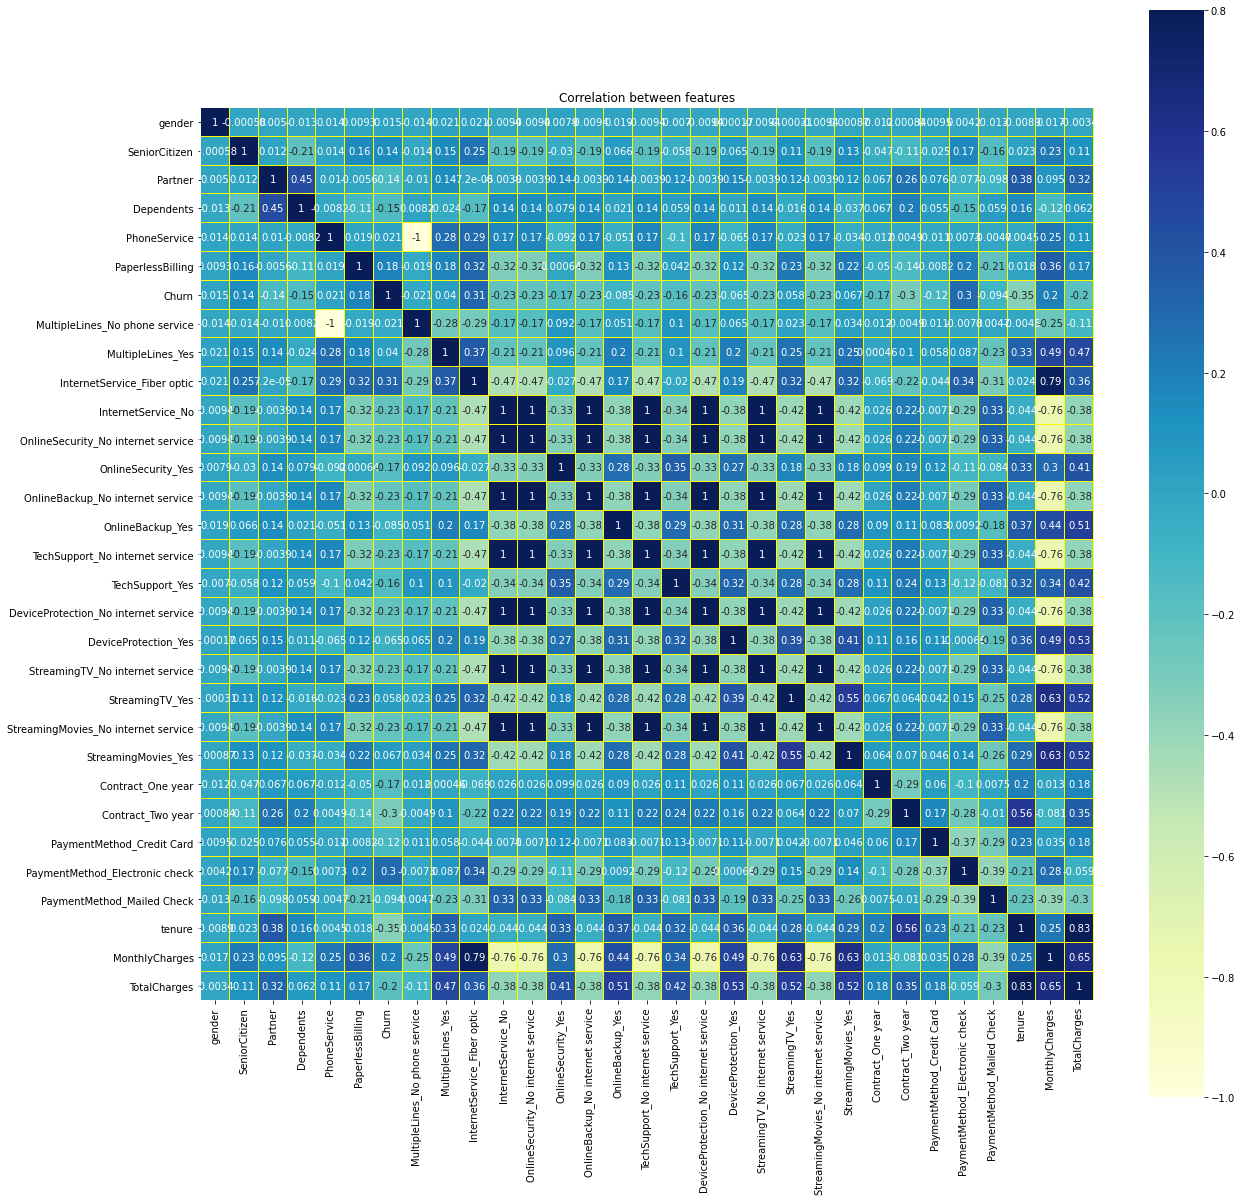

In [160]:
# Correlation
corr = churn_data_scaled.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='yellow')
plt.title('Correlation between features')


There is correlation or we can say redundacny between following columns
InternetService_No vs OnlineSecurity_No internet service, OnlineBackup_No internet service, TechSupport_No internet service, DeviceProtection_No internet service, StreamingTV_No internet service, StreamingMovies_No internet service

There is a negative correlation exist between 
PhoneService and MultipleLines_No phone service

There is a strong correlation between MonthlyCharges vs InternetService_Fiber optic and 
TotalCharges vs tenure



Hence removing all positive and negative correlated column and removing TotalCharges and MonthlyCharges columns

In [161]:
churn_data_scaled.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit Card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed Check', 'tenure', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [162]:
#Removing redundant columns
churn_data_scaled.drop(columns =['OnlineSecurity_No internet service','OnlineBackup_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'StreamingTV_No internet service','StreamingMovies_No internet service','MultipleLines_No phone service','MonthlyCharges','TotalCharges'], inplace=True)
churn_data.head(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_Electronic check,PaymentMethod_Mailed Check
0,0,0,1,1,12.0,1,0,19.70,258.35,0,...,0,1,0,1,0,0,1,0,0,1
1,1,0,0,0,42.0,1,0,73.90,3160.55,1,...,1,0,0,0,1,1,0,1,0,0
2,0,0,1,0,71.0,1,0,65.15,4681.75,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,71.0,1,0,85.45,6300.85,0,...,1,0,1,0,1,1,0,0,1,0
4,0,0,0,0,30.0,1,0,70.40,2044.75,0,...,0,0,1,0,0,1,0,0,1,0
5,1,0,1,1,9.0,1,0,65.00,663.05,1,...,1,0,0,0,0,0,0,0,0,1
6,0,0,1,0,72.0,1,1,99.15,7422.10,0,...,1,0,0,0,1,0,1,0,1,0
7,0,0,0,0,28.0,1,0,91.00,2626.15,0,...,1,0,0,0,1,0,0,0,1,0


Text(0.5, 1.0, 'Correlation between features')

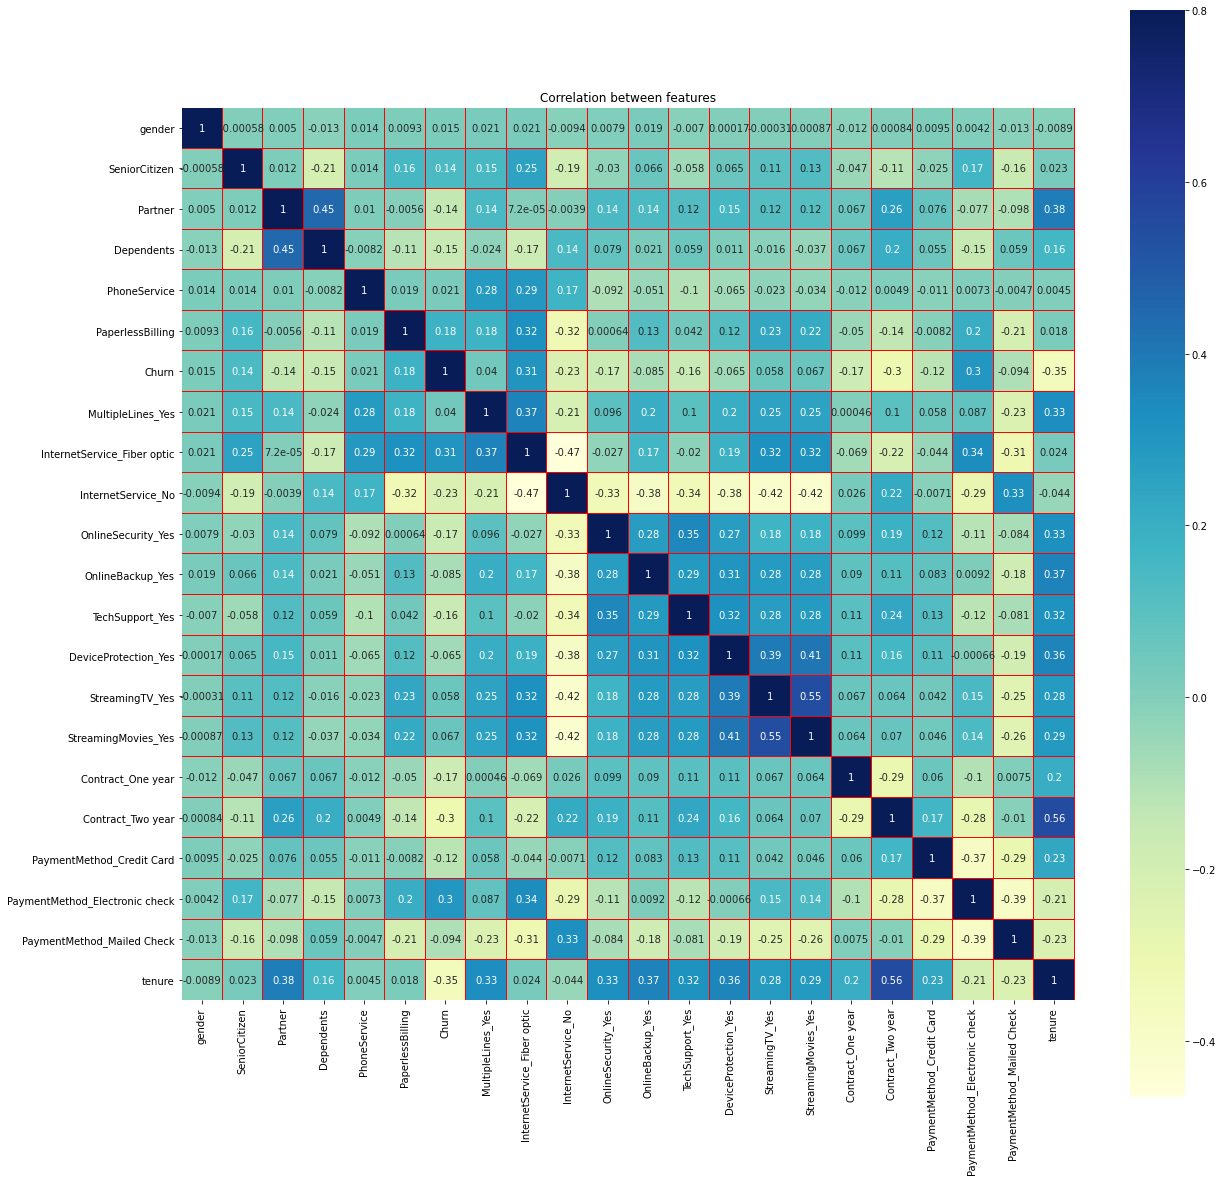

In [163]:
# Correlation
corr = churn_data_scaled.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='red')
plt.title('Correlation between features')

In [164]:
#We'll proceed with TrainTestSplit without removing any column.
X = churn_data_scaled.loc[:,churn_data_scaled.columns != 'Churn']
y = churn_data_scaled.Churn
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_Electronic check,PaymentMethod_Mailed Check
0,0,0,1,1,12.0,1,0,19.70,258.35,0,...,0,1,0,1,0,0,1,0,0,1
1,1,0,0,0,42.0,1,0,73.90,3160.55,1,...,1,0,0,0,1,1,0,1,0,0
2,0,0,1,0,71.0,1,0,65.15,4681.75,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,71.0,1,0,85.45,6300.85,0,...,1,0,1,0,1,1,0,0,1,0
4,0,0,0,0,30.0,1,0,70.40,2044.75,0,...,0,0,1,0,0,1,0,0,1,0


In [165]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_Electronic check,PaymentMethod_Mailed Check
0,0,0,1,1,12.0,1,0,19.70,258.35,0,...,0,1,0,1,0,0,1,0,0,1
1,1,0,0,0,42.0,1,0,73.90,3160.55,1,...,1,0,0,0,1,1,0,1,0,0
2,0,0,1,0,71.0,1,0,65.15,4681.75,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,71.0,1,0,85.45,6300.85,0,...,1,0,1,0,1,1,0,0,1,0
4,0,0,0,0,30.0,1,0,70.40,2044.75,0,...,0,0,1,0,0,1,0,0,1,0


In [166]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [167]:
#Logistic Regression Model prediction
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [168]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score
print(' Accuracy '+ str(accuracy_score(y_train,y_pred_train)))
cf_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)

 Accuracy 0.8031950299534059


In [169]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score
print(' Accuracy '+ str(accuracy_score(y_test,y_pred_test)))

 Accuracy 0.8074534161490683


In [170]:
from sklearn import metrics
model_score = logreg.score(X_test, y_test)
print(model_score)
cf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

0.8074534161490683


<AxesSubplot:>

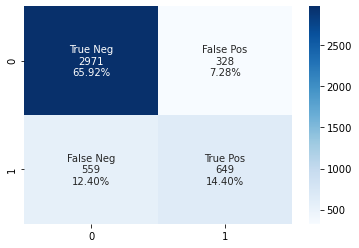

In [173]:
#Confustion Matrix for train
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_train.flatten()/np.sum(cf_matrix_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_train, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

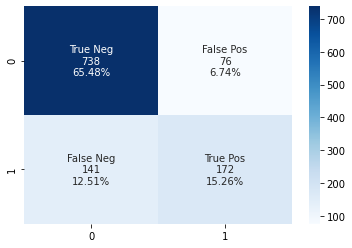

In [174]:

#Confution Matrix for Test 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [175]:
#Classification report
print(classification_report(y_test, y_pred_test)) 

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       814
           1       0.69      0.55      0.61       313

    accuracy                           0.81      1127
   macro avg       0.77      0.73      0.74      1127
weighted avg       0.80      0.81      0.80      1127



In [176]:
test_churn = pd.DataFrame(data=(y_pred_test))

In [177]:
test_churn

,0
0,0
1,0
2,0
3,1
4,0
...,...
1122,0
1123,0
1124,0
1125,1


Accuracy Score 0.8031950299534059 which is almost 80% . 

### Importing Test DataSet  and using the Logistic Regression Model for prediction

In [178]:
#Importing TestDataset
churn_data_test = pd.read_csv("Churn_test.csv")
churn_data_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [179]:
#Cleaning the data as we did with train set
churn_data_test.shape

(1409, 20)

In [180]:
#Checking if any values in the variables are null 
churn_data_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [181]:
#Total Charge is string but should be float
churn_data_test['TotalCharges'] = pd.to_numeric(churn_data_test['TotalCharges'], errors='coerce')

churn_data_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [182]:
# NA rows will be filled with Mean of TotalCharges column
churn_data_test['TotalCharges'].fillna(value=churn_data_test['TotalCharges'].mean(), inplace=True)

In [114]:
churn_data_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [183]:
#Tenure is int but should be float
churn_data_test['tenure'] = churn_data_test['tenure'].astype(float)
churn_data_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66.0,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5.0,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [184]:
#customerID is unique value column and add no sense to data. Hence keeping it in seprate dataframe for output csv and removing from main dataframe
custId = churn_data_test.customerID
churn_data_test.drop(columns ='customerID', inplace=True)

In [185]:
#Features requires label encoding
label_features = ['Partner','Dependents','PhoneService','PaperlessBilling']
   

label_encoding(label_features,churn_data_test)
churn_data_test['gender'] = churn_data_test['gender'].map({'Female':1,'Male':0})

In [186]:
#Features requires one hot encoding
ohe_features = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection','StreamingTV','StreamingMovies','Contract','PaymentMethod']

churn_data_test = pd.get_dummies(churn_data_test,columns=ohe_features, drop_first=True)

In [187]:
# We need to scale Tenure, Monthly Charges and Total Charges
# We will use min max scaling since there are not outliers as seen before.

mms_features = ['tenure','MonthlyCharges','TotalCharges']

df_feature_mms = pd.DataFrame(churn_data_test, columns=mms_features)
df_remaining_features = churn_data_test.drop(columns=mms_features)

minmaxscaler = MinMaxScaler()
rescaled_features =  minmaxscaler.fit_transform(df_feature_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=mms_features, index=df_remaining_features.index)

churn_data_test_scaled = pd.concat([df_remaining_features, df_rescaled_features], axis = 1)

In [188]:
churn_data_test_scaled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0.569444,0.611194,0.381539
1,1,1,0,0,1,1,0,1,1,0,...,0,1,0,1,0,0,0,0.916667,0.836582,0.745691
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.166667,0.262869,0.058377
3,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0.069444,0.318841,0.026666
4,1,0,1,1,1,1,0,0,0,0,...,0,1,1,0,0,0,1,0.138889,0.471764,0.074059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,1,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,1,0.347222,0.872064,0.304631
1405,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0.208333,0.008996,0.036102
1406,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.986111,0.352324,0.447167
1407,0,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0.902778,0.670165,0.655158


In [189]:
#Removing redundant columns
churn_data_test_scaled.drop(columns =['OnlineSecurity_No internet service','OnlineBackup_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'StreamingTV_No internet service','StreamingMovies_No internet service','MultipleLines_No phone service','MonthlyCharges','TotalCharges'], inplace=True)

In [190]:
#We have X features only and we need to predict Y
X_test = churn_data_test_scaled
y_pred_test = logreg.predict(X_test)

In [193]:
testDataFrame= pd.DataFrame(data=y_pred_test)

In [195]:
testDataFrame

,0
0,0
1,0
2,0
3,0
4,0
...,...
1404,1
1405,0
1406,0
1407,0


In [196]:
testDataFrame[0] = testDataFrame[0].map({1:'Yes', 0:'No'})

In [197]:
testDataFrame.insert(0,'',custId)


In [198]:
testDataFrame

,,0
0,8879-ZKJOF,No
1,0201-MIBOL,No
2,1600-DILPE,No
3,8601-QACRS,No
4,7919-ZODZZ,No
...,...,...
1404,5130-IEKQT,Yes
1405,4452-ROHMO,No
1406,6164-HAQTX,No
1407,3982-DQLUS,No


In [200]:
testDataFrame.to_csv('ML_Project1_submission.csv', index =False, header = False)

### Insights
Accuracy Score of Test Data is 0.8031950299534059 which is 80% and thus completes the project